In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_excel("data/clinic2.xlsx")

Mounted at /content/drive


In [6]:
## Data Cleaning and Preprocessing


In [7]:
# Let's say you want to delete columns 'Menopose' and 'PT'

columns_to_delete = ['Menopose', 'PT']
data = data.drop(columns=columns_to_delete)

In [8]:

import re



# Identify and handle non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

# Convert non-numeric columns to categorical data type
data[non_numeric_cols] = data[non_numeric_cols].astype('category')

# Impute missing values in numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])



In [9]:
# Round column 'Direct Bilirubin' to 2 decimal places
data['Direct Bilirubin'] = data['Direct Bilirubin'].round(2)

In [10]:
data['Albumin'] = data['Albumin'].round(1)

In [11]:
# columns_to_convert = ['A', 'B', 'C']

# # Convert decimal numbers to whole numbers
# data[columns_to_convert] = data[columns_to_convert].astype(int)

In [12]:
# Correct the values
data['wake up clockkmorning'] = data['wake up clockkmorning'].replace(830, 8.3)
data['wake up clockkmorning'] = data['wake up clockkmorning'].replace('6..30', 6.3)
data['wake up clockkmorning'] = data['wake up clockkmorning'].replace(7.35, 7.3)
data['wake up clockkmorning'] = data['wake up clockkmorning'].replace(8.2, 8.3)

<ipython-input-12-9f3203123e5b>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['wake up clockkmorning'] = data['wake up clockkmorning'].replace(830, 8.3)
<ipython-input-12-9f3203123e5b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['wake up clockkmorning'] = data['wake up clockkmorning'].replace('6..30', 6.3)
<ipython-input-12-9f3203123e5b>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories

In [13]:
#rename a column
data = data.rename(columns={' sex': 'gender'})
data = data.rename(columns={'hight': 'height'})
data = data.rename(columns={'Direct Bilirubin': 'Direct_Bilirubin'})
data = data.rename(columns={'fatty liver  grade pre': 'fatty_liver_grade_pre'})
data = data.rename(columns={'fatty liver grade post': 'fatty_liver_grade_post'})
data = data.rename(columns={'sleep night clock': 'sleep_night_clock'})
data = data.rename(columns={'wake up clockkmorning': 'wake_up_clock_morning'})

In [14]:
# Convert the category column to float using the cat.codes attribute
data['age'] = data['age'].astype(float)
data['wake_up_clock_morning'] = data['wake_up_clock_morning'].astype(float)

In [15]:
# Assuming 'wake up clockkmorning' is the name of the column you want to check
column_to_check = data['sleep_night_clock']

# Get unique values and their counts
unique_values = column_to_check.value_counts()

# You can also print the length of unique values and the unique values themselves
print("Length:", len(unique_values))
print("Categories:", unique_values.index.tolist())

Length: 10
Categories: [1.3, 12.3, 12.0, 2.0, 11.0, 11.3, 2.3, 1.0, 10.3, 3.0]


In [16]:
data['sleep_night_clock'] = data['sleep_night_clock'].apply(lambda x: x + 12 if x > 8 else x)

In [17]:
# Assuming 'wake up clockkmorning' is the name of the column you want to check
column_to_check = data['wake_up_clock_morning']

# Get unique values and their counts
unique_values = column_to_check.value_counts()

# You can also print the length of unique values and the unique values themselves
print("Length:", len(unique_values))
print("Categories:", unique_values.index.tolist())

Length: 12
Categories: [7.3, 6.3, 8.3, 8.0, 7.0, 9.0, 9.3, 10.0, 6.0, 10.3, 5.3, 11.0]


In [18]:
data['sleep_duration'] = data.apply(lambda x: 24-int(str(x['sleep_night_clock'])[-2:]) + abs(x['sleep_night_clock']) + x['wake_up_clock_morning'] if len(str(x['sleep_night_clock'])) == 2 else abs(x['sleep_night_clock']-x['wake_up_clock_morning']), axis=1)

In [19]:


# Define a function to apply the operation
def custom_operation(row):
    if len(str(int(row['sleep_night_clock']))) == 2:
        result = abs(24 - row['sleep_night_clock']) + row['wake_up_clock_morning']
    else:
        result = abs(row['sleep_night_clock'] - row['wake_up_clock_morning'])
    return result

# Apply the function across the rows and create a new column with the result
data['sleep_duration'] = data.apply(custom_operation, axis=1)


In [20]:
#decimal numbers
# data['sleep_night_clock'] = data['sleep_night_clock'].apply(lambda x: '{:.2f}'.format(x))
# data['wake_up_clock_morning'] = data['wake_up_clock_morning'].apply(lambda x: '{:.2f}'.format(x))
data['sleep_duration'] = data['sleep_duration'].apply(lambda x: round(x, 1))

In [21]:
data = data.drop(['code'], axis=1)

In [22]:
# data['sleep_duration'] = data['sleep_duration'].where(data['sleep_duration'] != 7.7, 7.3)
# data['sleep_duration'] = data['sleep_duration'].where(data['sleep_duration'] != 6.6, 6.0)
# data['sleep_duration'] = data['sleep_duration'].where(data['sleep_duration'] != 8.7, 8.3)
# data['sleep_duration'] = data['sleep_duration'].where(data['sleep_duration'] != 6.7, 7.3)
# data['sleep_duration'] = data['sleep_duration'].where(data['sleep_duration'] != 8.6, 8.0)
# data['sleep_duration'] = data['sleep_duration'].where(data['sleep_duration'] != 7.6, 7.0)
# data['sleep_duration'] = data['sleep_duration'].where(data['sleep_duration'] != 5.7, 5.3)
# data['sleep_duration'] = data['sleep_duration'].where(data['sleep_duration'] != 9.7, 9.3)
# data['sleep_duration'] = data['sleep_duration'].where(data['sleep_duration'] != 4.7, 4.3)
# data['sleep_duration'] = data['sleep_duration'].where(data['sleep_duration'] != 3.7, 3.3)
# data['sleep_duration'] = data['sleep_duration'].where(data['sleep_duration'] != 7.7, 7.3)

In [23]:
# Using a dictionary
replacements = {7.7: 7.3, 6.6: 6.0, 8.7: 8.3, 6.7: 7.3, 8.6: 8.0, 7.6: 7.0, 5.7: 5.3, 9.7: 9.3, 4.7: 4.3, 3.7: 3.3}
data['sleep_duration'] = data['sleep_duration'].replace(replacements)

# Using a list of tuples
replacements = [(7.7, 7.3), (6.6, 6.0), (8.7, 8.3), (6.7, 7.3), (8.6, 8.0), (7.6, 7.0), (5.7, 5.3), (9.7, 9.3), (4.7, 4.3), (3.7, 3.3)]
for old_value, new_value in replacements:
    data['sleep_duration'] = data['sleep_duration'].replace(old_value, new_value)

In [24]:
# # Save the modified data back to a CSV file
# data.to_csv("data_modified.csv", index=False)

In [25]:
data['WHR2'] = data['WHR2'].replace(96.0, 0.96)

In [26]:
data['TG2'] = data['TG2'].replace(21.0, 100.0)
data['TG2'] = data['TG2'].replace(10.0, 121.0)

In [27]:
data['CHO2'] = data['CHO2'].replace(468.0, 268.0)

In [28]:
# Save the modified data back to a CSV file
data.to_csv("data_modified.csv", index=False)

In [29]:
data['fatty_liver_grade_pre'] = data['fatty_liver_grade_pre'].replace(2.2, 2.0)
data['fatty_liver_grade_pre'] = data['fatty_liver_grade_pre'].replace(1.2, 1.0)


In [30]:
data.loc[:149, 'gender'] = data.loc[:149, 'gender'].replace(2, 1)

In [31]:
# Assuming 'wake up clockkmorning' is the name of the column you want to check
column_to_check = data['fatty_liver_grade_pre']

# Get unique values and their counts
unique_values = column_to_check.value_counts()

# You can also print the length of unique values and the unique values themselves
print("Length:", len(unique_values))
print("Categories:", unique_values.index.tolist())

Length: 5
Categories: [2.0, 3.0, 1.0, 1.5, 2.5]


In [32]:
data['fatty_liver_grade_pre'] = data['fatty_liver_grade_pre'].replace(1.0, 2.0)
data['fatty_liver_grade_pre'] = data['fatty_liver_grade_pre'].replace(1.5, 2.0)
data['fatty_liver_grade_pre'] = data['fatty_liver_grade_pre'].replace(2.5, 3.0)


In [33]:
item_counts = data['fatty_liver_grade_pre'].value_counts()

print(item_counts)

fatty_liver_grade_pre
2.0    192
3.0    114
Name: count, dtype: int64


In [34]:
# List of columns you want to select
selected_columns = ['age', 'gender', 'height','weight1', 'BFP1', 'WHR1','FBS1', 'TG1', 'CHO1',
                    'ALT1', 'AST1', 'ALP1','Direct_Bilirubin','Albumin', 'sleep_duration',
                    'sleep_night_clock', 'wake_up_clock_morning', 'fatty_liver_grade_pre', ]
df = data[selected_columns]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your dataset (assuming it's in a CSV file)
# data = pd.read_csv('data.csv')

# Check for missing values
print(df.isnull().sum())

# Handle missing values (this is a simple example, use more sophisticated methods if necessary)
df = df.dropna()

# Encode categorical variables if any (e.g., 'gender')
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

# Split features and target
X = df[selected_columns[:-1]]
y = df['fatty_liver_grade_pre']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("General Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Separate data by gender
data_men = df[df['gender'] == 1]
data_women = df[df['gender'] == 0]

# Split features and target for men
X_men = data_men[selected_columns[:-1]]
y_men = data_men['fatty_liver_grade_pre']
X_men_scaled = scaler.fit_transform(X_men)

# Train-test split for men
X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(X_men_scaled, y_men, test_size=0.3, random_state=42)

# Model training for men
rf_classifier_men = RandomForestClassifier(random_state=42)
rf_classifier_men.fit(X_train_men, y_train_men)

# Predictions for men
y_pred_men = rf_classifier_men.predict(X_test_men)

# Evaluation for men
print("Men Model Accuracy:", accuracy_score(y_test_men, y_pred_men))
print("Classification Report for Men:\n", classification_report(y_test_men, y_pred_men))
print("Confusion Matrix for Men:\n", confusion_matrix(y_test_men, y_pred_men))

# Repeat for women
X_women = data_women[selected_columns[:-1]]
y_women = data_women['fatty_liver_grade_pre']
X_women_scaled = scaler.fit_transform(X_women)

# Train-test split for women
X_train_women, X_test_women, y_train_women, y_test_women = train_test_split(X_women_scaled, y_women, test_size=0.3, random_state=42)

# Model training for women
rf_classifier_women = RandomForestClassifier(random_state=42)
rf_classifier_women.fit(X_train_women, y_train_women)

# Predictions for women
y_pred_women = rf_classifier_women.predict(X_test_women)

# Evaluation for women
print("Women Model Accuracy:", accuracy_score(y_test_women, y_pred_women))
print("Classification Report for Women:\n", classification_report(y_test_women, y_pred_women))
print("Confusion Matrix for Women:\n", confusion_matrix(y_test_women, y_pred_women))

from sklearn.svm import SVC

# Train the SVM model
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
print("General SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Men
svm_classifier_men = SVC(random_state=42)
svm_classifier_men.fit(X_train_men, y_train_men)
y_pred_svm_men = svm_classifier_men.predict(X_test_men)
print("Men SVM Model Accuracy:", accuracy_score(y_test_men, y_pred_svm_men))
print("SVM Classification Report for Men:\n", classification_report(y_test_men, y_pred_svm_men))
print("SVM Confusion Matrix for Men:\n", confusion_matrix(y_test_men, y_pred_svm_men))

# Women
svm_classifier_women = SVC(random_state=42)
svm_classifier_women.fit(X_train_women, y_train_women)
y_pred_svm_women = svm_classifier_women.predict(X_test_women)
print("Women SVM Model Accuracy:", accuracy_score(y_test_women, y_pred_svm_women))
print("SVM Classification Report for Women:\n", classification_report(y_test_women, y_pred_svm_women))
print("SVM Confusion Matrix for Women:\n", confusion_matrix(y_test_women, y_pred_svm_women))

from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
print("General GB Model Accuracy:", accuracy_score(y_test, y_pred_gb))
print("GB Classification Report:\n", classification_report(y_test, y_pred_gb))
print("GB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

# Men
gb_classifier_men = GradientBoostingClassifier(random_state=42)
gb_classifier_men.fit(X_train_men, y_train_men)
y_pred_gb_men = gb_classifier_men.predict(X_test_men)
print("Men GB Model Accuracy:", accuracy_score(y_test_men, y_pred_gb_men))
print("GB Classification Report for Men:\n", classification_report(y_test_men, y_pred_gb_men))
print("GB Confusion Matrix for Men:\n", confusion_matrix(y_test_men, y_pred_gb_men))

# Women
gb_classifier_women = GradientBoostingClassifier(random_state=42)
gb_classifier_women.fit(X_train_women, y_train_women)
y_pred_gb_women = gb_classifier_women.predict(X_test_women)
print("Women GB Model Accuracy:", accuracy_score(y_test_women, y_pred_gb_women))
print("GB Classification Report for Women:\n", classification_report(y_test_women, y_pred_gb_women))
print("GB Confusion Matrix for Women:\n", confusion_matrix(y_test_women, y_pred_gb_women))

from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
print("General KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Men
knn_classifier_men = KNeighborsClassifier()
knn_classifier_men.fit(X_train_men, y_train_men)
y_pred_knn_men = knn_classifier_men.predict(X_test_men)
print("Men KNN Model Accuracy:", accuracy_score(y_test_men, y_pred_knn_men))
print("KNN Classification Report for Men:\n", classification_report(y_test_men, y_pred_knn_men))
print("KNN Confusion Matrix for Men:\n", confusion_matrix(y_test_men, y_pred_knn_men))

# Women
knn_classifier_women = KNeighborsClassifier()
knn_classifier_women.fit(X_train_women, y_train_women)
y_pred_knn_women = knn_classifier_women.predict(X_test_women)
print("Women KNN Model Accuracy:", accuracy_score(y_test_women, y_pred_knn_women))
print("KNN Classification Report for Women:\n", classification_report(y_test_women, y_pred_knn_women))
print("KNN Confusion Matrix for Women:\n", confusion_matrix(y_test_women, y_pred_knn_women))


age                      0
gender                   0
height                   0
weight1                  0
BFP1                     0
WHR1                     0
FBS1                     0
TG1                      0
CHO1                     0
ALT1                     0
AST1                     0
ALP1                     0
Direct_Bilirubin         0
Albumin                  0
sleep_duration           0
sleep_night_clock        0
wake_up_clock_morning    0
fatty_liver_grade_pre    0
dtype: int64
General Model Accuracy: 0.6630434782608695
Classification Report:
               precision    recall  f1-score   support

         2.0       0.67      0.88      0.76        56
         3.0       0.63      0.33      0.44        36

    accuracy                           0.66        92
   macro avg       0.65      0.60      0.60        92
weighted avg       0.66      0.66      0.63        92

Confusion Matrix:
 [[49  7]
 [24 12]]
Men Model Accuracy: 0.75
Classification Report for Men:
             

In [35]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # List of columns you want to select
# selected_columns = ['age', 'gender', 'height', 'weight1', 'BFP1', 'WHR1', 'FBS1', 'TG1', 'CHO1',
#                     'ALT1', 'AST1', 'ALP1', 'Direct_Bilirubin', 'Albumin', 'sleep_duration',
#                     'sleep_night_clock', 'wake_up_clock_morning', 'fatty_liver_grade_pre']

# # Load your dataset (assuming it's in a CSV file)
# # data = pd.read_csv('data.csv')
# df = data[selected_columns]

# # Check for missing values and drop them
# print(df.isnull().sum())
# df = df.dropna()

# # Encode categorical variables if any (e.g., 'gender')
# label_encoder = LabelEncoder()
# df['gender'] = label_encoder.fit_transform(df['gender'])

# # Split features and target
# X = df[selected_columns[:-1]]
# y = df['fatty_liver_grade_pre']

# # Scale features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# # Define models to be trained
# models = {
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'SVM': SVC(random_state=42),
#     'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#     'KNN': KNeighborsClassifier()
# }

# # Function to train, predict, and evaluate model
# def train_and_evaluate(model, X_train, X_test, y_train, y_test, label="General"):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(f"\n{label} Model Accuracy: {accuracy_score(y_test, y_pred)}")
#     print(f"{label} Classification Report:\n{classification_report(y_test, y_pred)}")
#     print(f"{label} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# # Train and evaluate models for general dataset
# for name, model in models.items():
#     train_and_evaluate(model, X_train, X_test, y_train, y_test, label=name)

# # Separate data by gender
# data_men = df[df['gender'] == 1]
# data_women = df[df['gender'] == 0]

# # Function to process gender-specific data
# def process_gender_specific_data(data_gender, gender_label):
#     X_gender = data_gender[selected_columns[:-1]]
#     y_gender = data_gender['fatty_liver_grade_pre']
#     X_gender_scaled = scaler.fit_transform(X_gender)
#     X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(
#         X_gender_scaled, y_gender, test_size=0.3, random_state=42)

#     for name, model in models.items():
#         train_and_evaluate(model, X_train_gender, X_test_gender, y_train_gender, y_test_gender, label=f"{gender_label} {name}")

# # Train and evaluate models for men and women
# process_gender_specific_data(data_men, "Men")
# process_gender_specific_data(data_women, "Women")


General Model Feature Importance:
                   Feature  General RF Importance
4                    BFP1               0.093528
8                    CHO1               0.079846
9                    ALT1               0.073584
7                     TG1               0.072620
13                Albumin               0.067385
11                   ALP1               0.066359
3                 weight1               0.065761
10                   AST1               0.058926
16  wake_up_clock_morning               0.058360
5                    WHR1               0.056146
15      sleep_night_clock               0.053628
6                    FBS1               0.053231
0                     age               0.053059
2                  height               0.052788
12       Direct_Bilirubin               0.049713
14         sleep_duration               0.038847
1                  gender               0.006219

Male-Specific Model Feature Importance:
                   Feature  Male RF Import

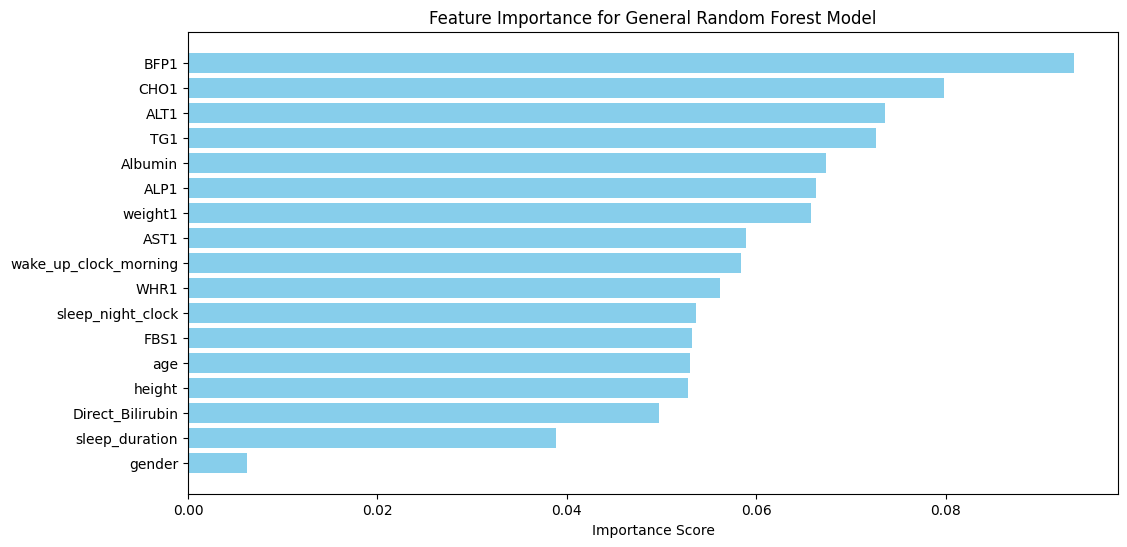

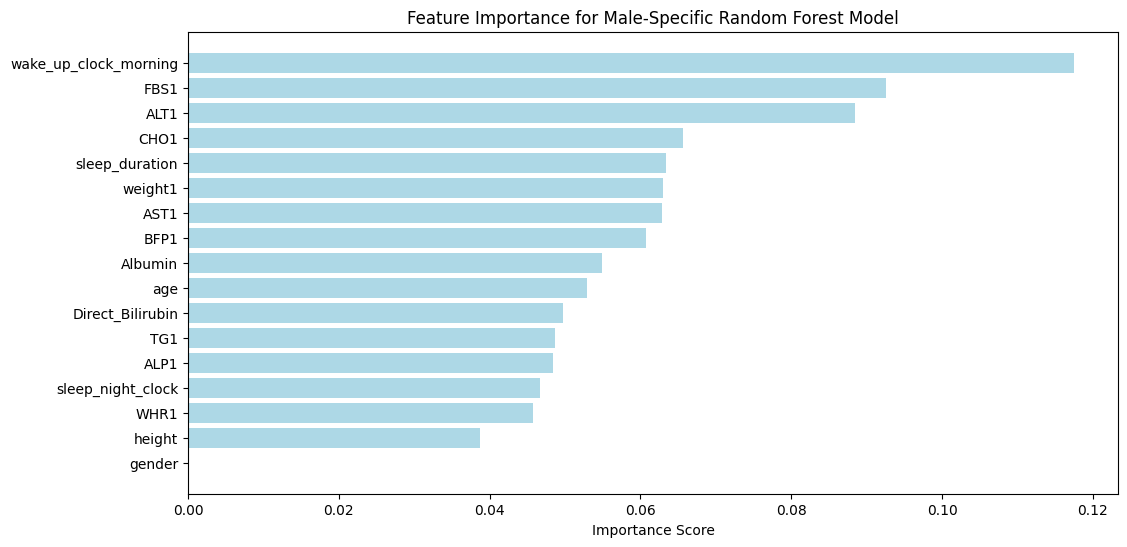

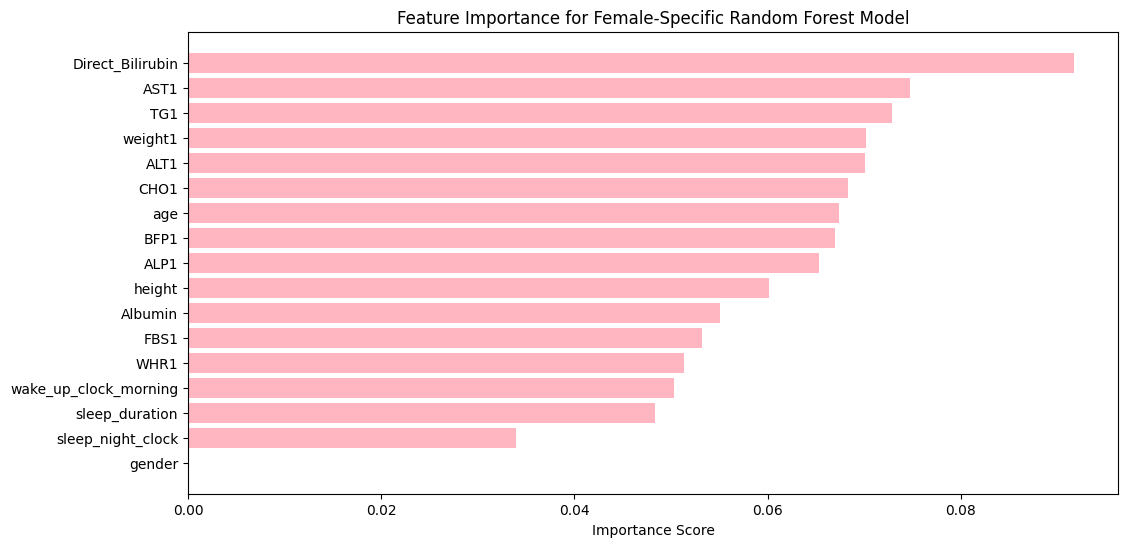

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# General feature importance
rf_feature_importance = rf_classifier.feature_importances_
gb_feature_importance = gb_classifier.feature_importances_

# Gender-specific feature importance
rf_feature_importance_men = rf_classifier_men.feature_importances_
rf_feature_importance_women = rf_classifier_women.feature_importances_

# Create DataFrames for visualization
feature_importance_df = pd.DataFrame({
    'Feature': selected_columns[:-1],
    'General RF Importance': rf_feature_importance,
}).sort_values(by='General RF Importance', ascending=False)

feature_importance_men_df = pd.DataFrame({
    'Feature': selected_columns[:-1],
    'Male RF Importance': rf_feature_importance_men
}).sort_values(by='Male RF Importance', ascending=False)

feature_importance_women_df = pd.DataFrame({
    'Feature': selected_columns[:-1],
    'Female RF Importance': rf_feature_importance_women
}).sort_values(by='Female RF Importance', ascending=False)

# Print feature importance tables
print("General Model Feature Importance:\n", feature_importance_df)
print("\nMale-Specific Model Feature Importance:\n", feature_importance_men_df)
print("\nFemale-Specific Model Feature Importance:\n", feature_importance_women_df)

# Visualization of feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['General RF Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance for General Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_men_df['Feature'], feature_importance_men_df['Male RF Importance'], color='lightblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance for Male-Specific Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_women_df['Feature'], feature_importance_women_df['Female RF Importance'], color='lightpink')
plt.xlabel('Importance Score')
plt.title('Feature Importance for Female-Specific Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


General Model Feature Importance (Gradient Boosting):
                   Feature  General GB Importance
7                     TG1               0.115604
4                    BFP1               0.114650
8                    CHO1               0.108771
16  wake_up_clock_morning               0.078694
15      sleep_night_clock               0.068446
9                    ALT1               0.065466
13                Albumin               0.064213
12       Direct_Bilirubin               0.058932
10                   AST1               0.056255
5                    WHR1               0.055398
3                 weight1               0.046367
11                   ALP1               0.044991
14         sleep_duration               0.037692
0                     age               0.034544
2                  height               0.028313
6                    FBS1               0.021526
1                  gender               0.000137

Male-Specific Model Feature Importance (Gradient Boosting):
  

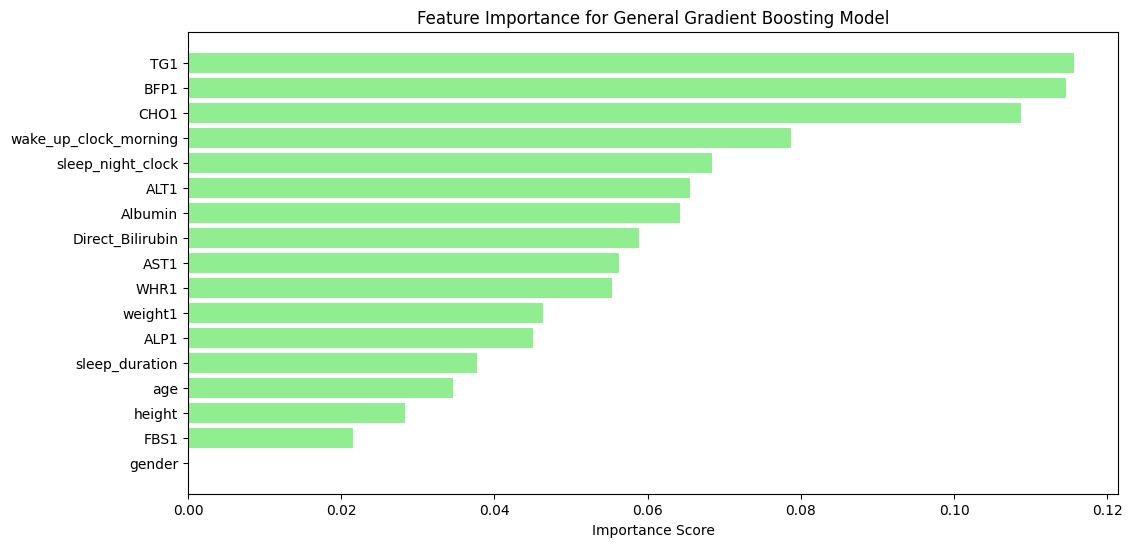

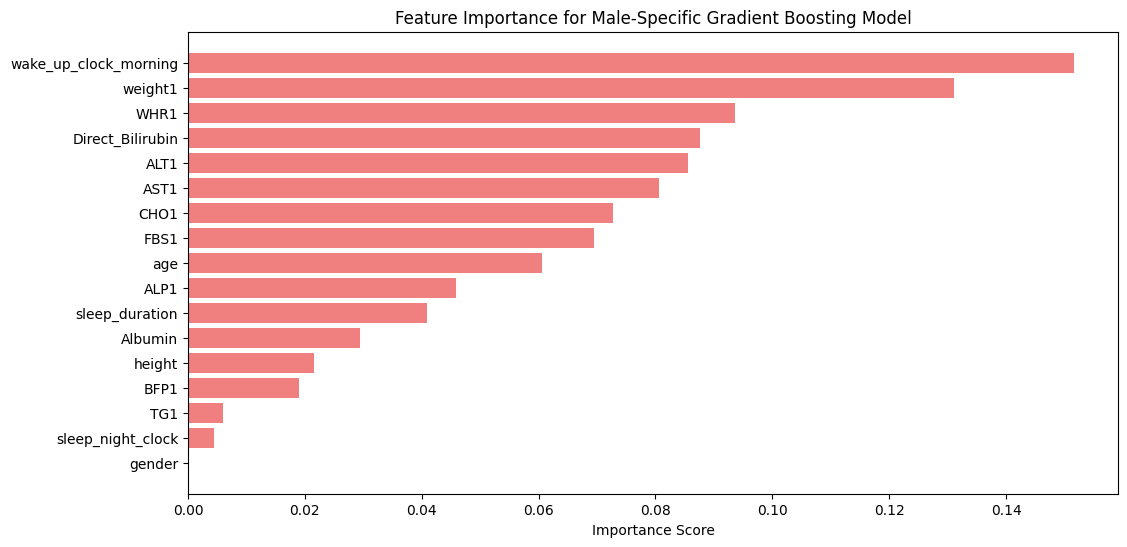

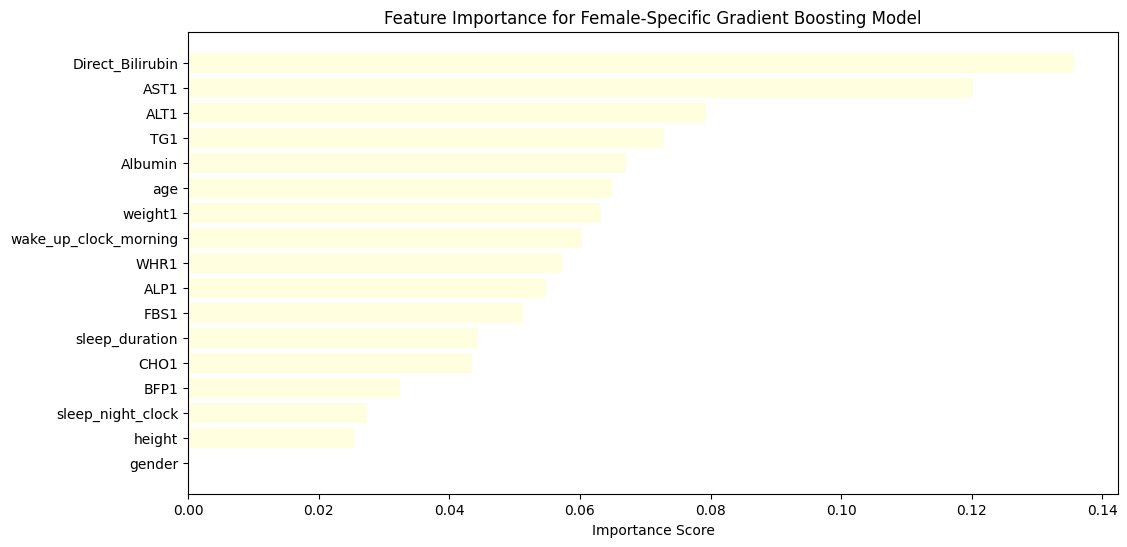

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# General feature importance for Gradient Boosting
gb_feature_importance = gb_classifier.feature_importances_

# Gender-specific feature importance for Gradient Boosting
gb_feature_importance_men = gb_classifier_men.feature_importances_
gb_feature_importance_women = gb_classifier_women.feature_importances_

# Create DataFrames for visualization for Gradient Boosting
feature_importance_gb_df = pd.DataFrame({
    'Feature': selected_columns[:-1],
    'General GB Importance': gb_feature_importance,
}).sort_values(by='General GB Importance', ascending=False)

feature_importance_gb_men_df = pd.DataFrame({
    'Feature': selected_columns[:-1],
    'Male GB Importance': gb_feature_importance_men
}).sort_values(by='Male GB Importance', ascending=False)

feature_importance_gb_women_df = pd.DataFrame({
    'Feature': selected_columns[:-1],
    'Female GB Importance': gb_feature_importance_women
}).sort_values(by='Female GB Importance', ascending=False)

# Print feature importance tables for Gradient Boosting
print("General Model Feature Importance (Gradient Boosting):\n", feature_importance_gb_df)
print("\nMale-Specific Model Feature Importance (Gradient Boosting):\n", feature_importance_gb_men_df)
print("\nFemale-Specific Model Feature Importance (Gradient Boosting):\n", feature_importance_gb_women_df)

# Visualization of feature importance for Gradient Boosting
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_gb_df['Feature'], feature_importance_gb_df['General GB Importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.title('Feature Importance for General Gradient Boosting Model')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_gb_men_df['Feature'], feature_importance_gb_men_df['Male GB Importance'], color='lightcoral')
plt.xlabel('Importance Score')
plt.title('Feature Importance for Male-Specific Gradient Boosting Model')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_gb_women_df['Feature'], feature_importance_gb_women_df['Female GB Importance'], color='lightyellow')
plt.xlabel('Importance Score')
plt.title('Feature Importance for Female-Specific Gradient Boosting Model')
plt.gca().invert_yaxis()
plt.show()


In [38]:
# Display the first few rows of the dataset
print("Dataset:\n", df)

# Get descriptive statistics for the numeric columns
print("\nDescriptive Statistics:")
print(df.describe())

# Get descriptive statistics for all columns, including categorical ones
print("\nDescriptive Statistics Including All Columns:")
print(df.describe(include='all'))

Dataset:
       age  gender  height  weight1  BFP1  WHR1   FBS1    TG1   CHO1  ALT1  \
0    42.0       0   160.0     73.5  43.0  0.90   98.0   99.0  220.0  44.0   
1    39.0       0   165.0     74.5  35.0  0.93  110.0  115.0  239.0  25.0   
2    42.0       0   168.0     92.5  50.0  0.95   98.0  204.0  258.0  30.0   
3    45.0       0   152.0     80.7  51.0  1.01   99.0  115.0  249.0  81.0   
4    47.0       0   164.0    103.7  45.2  1.03  103.0  142.0  255.0  24.0   
..    ...     ...     ...      ...   ...   ...    ...    ...    ...   ...   
301  44.0       1   179.0     95.3  39.2  0.87   94.0  145.0  249.0  41.0   
302  46.0       1   173.0    102.4  32.5  0.89  108.0  128.0  267.0  63.0   
303  43.0       1   179.0     98.3  38.9  0.86  103.0  175.0  328.0  37.0   
304  58.0       1   180.0    105.8  45.3  0.90   94.0  168.0  345.0  48.0   
305  49.0       1   184.0    114.8  35.0  0.89  107.0  175.0  369.0  65.0   

     AST1   ALP1  Direct_Bilirubin  Albumin  sleep_duration  \
0 

In [39]:
# Get median of all numerical columns
print("\nMedian values:\n", df.median())

# Get standard deviation of all numerical columns
print("\nStandard Deviation:\n", df.std())

# Get value counts for categorical column (e.g., Gender)
print("\nGender Value Counts:\n", df['gender'].value_counts())



Median values:
 age                       48.00
gender                     0.00
height                   165.00
weight1                   88.00
BFP1                      39.20
WHR1                       0.92
FBS1                      99.00
TG1                      153.00
CHO1                     258.00
ALT1                      37.50
AST1                      32.50
ALP1                     149.00
Direct_Bilirubin           0.48
Albumin                    4.50
sleep_duration             7.30
sleep_night_clock         22.30
wake_up_clock_morning      7.30
fatty_liver_grade_pre      2.00
dtype: float64

Standard Deviation:
 age                       8.278755
gender                    0.495615
height                   10.590491
weight1                  12.550778
BFP1                      4.505465
WHR1                      0.047056
FBS1                      5.857303
TG1                      26.634571
CHO1                     37.725391
ALT1                     17.125939
AST1                

In [40]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# import matplotlib.pyplot as plt

# # List of columns you want to select
# selected_columns = ['age', 'gender', 'height', 'weight1', 'BFP1', 'WHR1', 'FBS1', 'TG1', 'CHO1',
#                     'ALT1', 'AST1', 'ALP1', 'Direct_Bilirubin', 'Albumin', 'sleep_duration',
#                     'sleep_night_clock', 'wake_up_clock_morning', 'fatty_liver_grade_pre']

# # Load your dataset (assuming it's in a CSV file)
# # data = pd.read_csv('data.csv')
# df = data[selected_columns]

# # Check for missing values and drop them
# print(df.isnull().sum())
# df = df.dropna()

# # Encode categorical variables if any (e.g., 'gender')
# label_encoder = LabelEncoder()
# df['gender'] = label_encoder.fit_transform(df['gender'])

# # Split features and target
# X = df[selected_columns[:-1]]
# y = df['fatty_liver_grade_pre']

# # Scale features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# # Define models to be trained
# models = {
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'SVM': SVC(probability=True, random_state=42),
#     'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#     'KNN': KNeighborsClassifier()
# }

# # Function to train, predict, evaluate, and calculate AUC
# def train_evaluate_roc(model, X_train, X_test, y_train, y_test, label="General"):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(f"\n{label} Model Accuracy: {accuracy_score(y_test, y_pred)}")
#     print(f"{label} Classification Report:\n{classification_report(y_test, y_pred)}")
#     print(f"{label} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

#     # AUC and ROC Curve
#     if hasattr(model, "predict_proba"):
#         y_pred_prob = model.predict_proba(X_test)[:, 1]
#     else:
#         y_pred_prob = model.decision_function(X_test)

#     fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=y_test.max())
#     roc_auc = auc(fpr, tpr)
#     print(f"{label} AUC: {roc_auc:.2f}")

#     # Plot ROC Curve
#     plt.figure()
#     plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'ROC Curve for {label}')
#     plt.legend(loc="lower right")
#     plt.grid(alpha=0.3)
#     plt.show()

# # Train, evaluate, and calculate AUC for the general dataset
# for name, model in models.items():
#     train_evaluate_roc(model, X_train, X_test, y_train, y_test, label=name)

# # Separate data by gender
# data_men = df[df['gender'] == 1]
# data_women = df[df['gender'] == 0]

# # Function to process gender-specific data
# def process_gender_specific_data(data_gender, gender_label):
#     X_gender = data_gender[selected_columns[:-1]]
#     y_gender = data_gender['fatty_liver_grade_pre']
#     X_gender_scaled = scaler.fit_transform(X_gender)
#     X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(
#         X_gender_scaled, y_gender, test_size=0.3, random_state=42)

#     for name, model in models.items():
#         train_evaluate_roc(model, X_train_gender, X_test_gender, y_train_gender, y_test_gender, label=f"{gender_label} {name}")

# # Train, evaluate, and calculate AUC for men and women
# process_gender_specific_data(data_men, "Men")
# process_gender_specific_data(data_women, "Women")


In [41]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# import matplotlib.pyplot as plt

# # List of columns you want to select
# selected_columns = ['age', 'gender', 'height', 'weight1', 'BFP1', 'WHR1', 'FBS1', 'TG1', 'CHO1',
#                     'ALT1', 'AST1', 'ALP1', 'Direct_Bilirubin', 'Albumin', 'sleep_duration',
#                     'sleep_night_clock', 'wake_up_clock_morning', 'fatty_liver_grade_pre']

# # Load your dataset (assuming it's in a CSV file)
# # data = pd.read_csv('data.csv')
# df = data[selected_columns]

# # Check for missing values and drop them
# df = df.dropna()

# # Encode categorical variables if any (e.g., 'gender')
# label_encoder = LabelEncoder()
# df['gender'] = label_encoder.fit_transform(df['gender'])

# # Split features and target
# X = df[selected_columns[:-1]]
# y = df['fatty_liver_grade_pre']

# # Scale features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# # Define models to be trained
# models = {
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'SVM': SVC(probability=True, random_state=42),
#     'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#     'KNN': KNeighborsClassifier()
# }

# # Function to train, evaluate, and calculate AUC
# def train_evaluate_roc(models, X_train, X_test, y_train, y_test, title):
#     plt.figure(figsize=(8, 6))
#     for name, model in models.items():
#         model.fit(X_train, y_train)

#         if hasattr(model, "predict_proba"):
#             y_pred_prob = model.predict_proba(X_test)[:, 1]
#         else:
#             y_pred_prob = model.decision_function(X_test)

#         fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=y_test.max())
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

#     plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'ROC Curve - {title}')
#     plt.legend(loc="lower right")
#     plt.grid(alpha=0.3)
#     plt.show()

# # General Model AUC Plot
# train_evaluate_roc(models, X_train, X_test, y_train, y_test, "General Model")

# # Separate data by gender
# data_men = df[df['gender'] == 1]
# data_women = df[df['gender'] == 0]

# # Function to process gender-specific data
# def process_gender_specific_data(data_gender, gender_label):
#     X_gender = data_gender[selected_columns[:-1]]
#     y_gender = data_gender['fatty_liver_grade_pre']
#     X_gender_scaled = scaler.fit_transform(X_gender)
#     X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(
#         X_gender_scaled, y_gender, test_size=0.3, random_state=42)

#     train_evaluate_roc(models, X_train_gender, X_test_gender, y_train_gender, y_test_gender, f"{gender_label} Model")

# # Train, evaluate, and calculate AUC for men and women
# process_gender_specific_data(data_men, "Male")
# process_gender_specific_data(data_women, "Female")


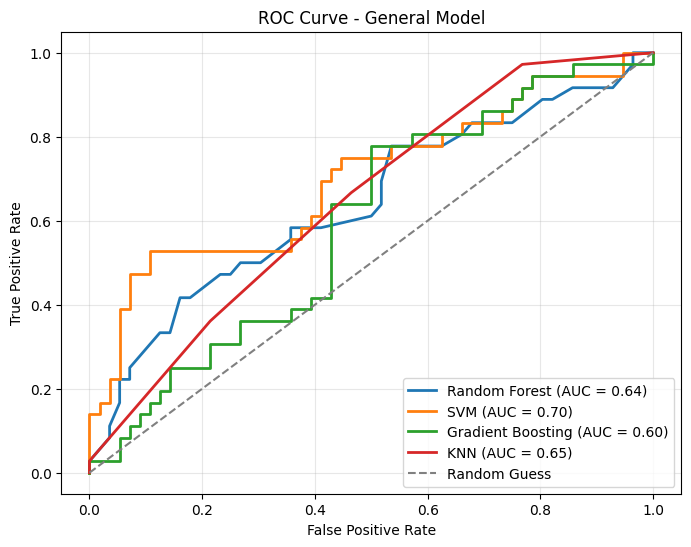

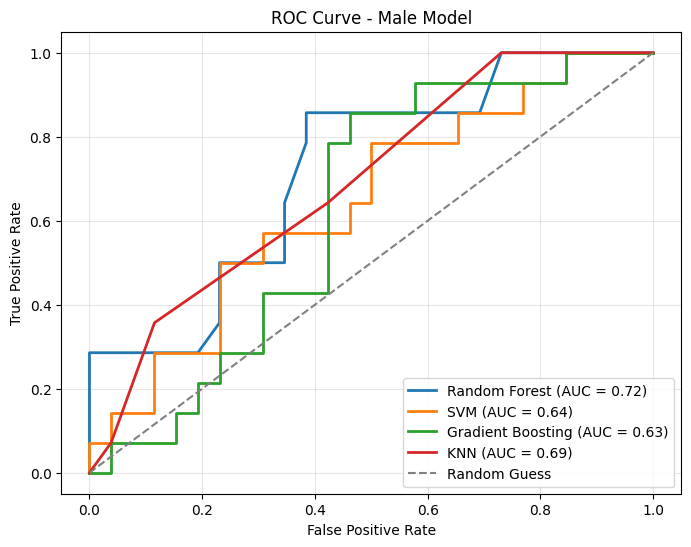

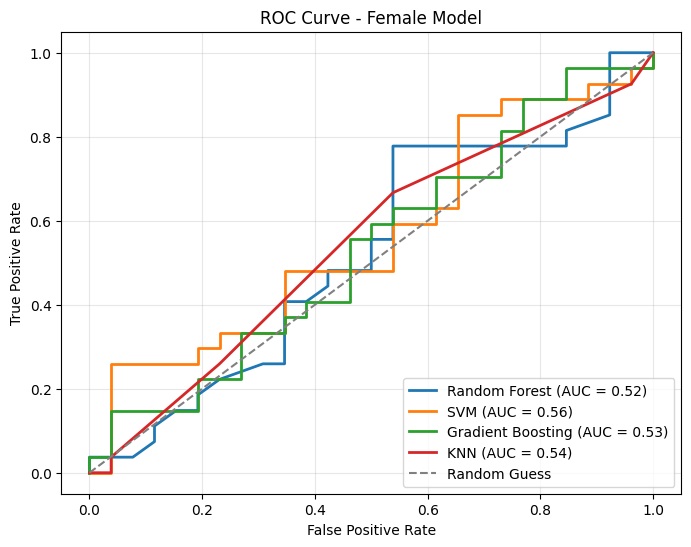

       Model Type         Classifier       AUC
0   General Model      Random Forest  0.641121
1   General Model                SVM  0.699405
2   General Model  Gradient Boosting  0.595734
3   General Model                KNN  0.647817
4      Male Model      Random Forest  0.721154
5      Male Model                SVM  0.642857
6      Male Model  Gradient Boosting  0.626374
7      Male Model                KNN  0.693681
8    Female Model      Random Forest  0.522792
9    Female Model                SVM  0.562678
10   Female Model  Gradient Boosting  0.534188
11   Female Model                KNN  0.544872


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# List of columns you want to select
selected_columns = ['age', 'gender', 'height', 'weight1', 'BFP1', 'WHR1', 'FBS1', 'TG1', 'CHO1',
                    'ALT1', 'AST1', 'ALP1', 'Direct_Bilirubin', 'Albumin', 'sleep_duration',
                    'sleep_night_clock', 'wake_up_clock_morning', 'fatty_liver_grade_pre']

# Load your dataset (assuming it's in a CSV file)
# data = pd.read_csv('data.csv')
df = data[selected_columns]

# Check for missing values and drop them
df = df.dropna()

# Encode categorical variables if any (e.g., 'gender')
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

# Split features and target
X = df[selected_columns[:-1]]
y = df['fatty_liver_grade_pre']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define models to be trained
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Function to train, evaluate, and calculate AUC
def train_evaluate_roc(models, X_train, X_test, y_train, y_test, title, auc_table):
    plt.figure(figsize=(8, 6))
    for name, model in models.items():
        model.fit(X_train, y_train)

        if hasattr(model, "predict_proba"):
            y_pred_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_prob = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=y_test.max())
        roc_auc = auc(fpr, tpr)
        auc_table.append([title, name, roc_auc])
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# Store AUC values
auc_table = []

# General Model AUC Plot
train_evaluate_roc(models, X_train, X_test, y_train, y_test, "General Model", auc_table)

# Separate data by gender
data_men = df[df['gender'] == 1]
data_women = df[df['gender'] == 0]

# Function to process gender-specific data
def process_gender_specific_data(data_gender, gender_label):
    X_gender = data_gender[selected_columns[:-1]]
    y_gender = data_gender['fatty_liver_grade_pre']
    X_gender_scaled = scaler.fit_transform(X_gender)
    X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(
        X_gender_scaled, y_gender, test_size=0.3, random_state=42)

    train_evaluate_roc(models, X_train_gender, X_test_gender, y_train_gender, y_test_gender, f"{gender_label} Model", auc_table)

# Train, evaluate, and calculate AUC for men and women
process_gender_specific_data(data_men, "Male")
process_gender_specific_data(data_women, "Female")

# Create a DataFrame for AUC values and display
auc_df = pd.DataFrame(auc_table, columns=['Model Type', 'Classifier', 'AUC'])
print(auc_df)

# import pandas as pd
# from tabulate import tabulate

# print(tabulate(auc_df, headers='keys', tablefmt='pretty'))



In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Load your dataset (replace 'your_file.csv' with your actual file name)


# Display the first few rows
# df.head()


In [45]:
# Summarize baseline characteristics
demographics = df.describe(include='all').T
print(demographics)


                       count        mean        std     min      25%     50%  \
age                    306.0   48.620915   8.278755   30.00   42.000   48.00   
gender                 306.0    0.428105   0.495615    0.00    0.000    0.00   
height                 306.0  169.300654  10.590491  148.00  160.000  165.00   
weight1                306.0   89.159477  12.550778   65.00   79.000   88.00   
BFP1                   306.0   39.598693   4.505465   29.20   36.425   39.20   
WHR1                   306.0    0.924412   0.047056    0.80    0.890    0.92   
FBS1                   306.0  100.591503   5.857303   92.00   96.000   99.00   
TG1                    306.0  157.290850  26.634571   98.00  138.250  153.00   
CHO1                   306.0  265.598039  37.725391  200.00  241.000  258.00   
ALT1                   306.0   40.937908  17.125939   15.00   27.000   37.50   
AST1                   306.0   34.418301  11.166469   19.00   25.000   32.50   
ALP1                   306.0  155.535948

In [46]:
# Define a function to calculate BMI
def calculate_bmi(height_cm, weight_kg):
    height_m = height_cm / 100  # Convert height to meters
    bmi = weight_kg / (height_m ** 2)  # BMI formula
    return int(bmi)  # Return BMI as an integer

# Apply the function to calculate BMI for each person
df['BMI'] = df.apply(lambda row: calculate_bmi(row['height'], row['weight1']), axis=1)

# Print the first few rows to check if BMI calculation worked
print(df[['height', 'weight1', 'BMI']].head())


   height  weight1  BMI
0   160.0     73.5   28
1   165.0     74.5   27
2   168.0     92.5   32
3   152.0     80.7   34
4   164.0    103.7   38


In [47]:
# Gender breakdown
gender_counts = df['gender'].value_counts()

# Age distribution summary
age_summary = df['age'].describe()

# BMI categories (let's assume BMI values are continuous and we categorize them)
# Defining categories for BMI: Underweight (<18.5), Normal (18.5-24.9), Overweight (25-29.9), Obese (≥30)
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# Count of participants in each BMI category
bmi_counts = df['BMI_category'].value_counts()

# Print the demographic summaries
print("Gender Breakdown:\n", gender_counts)
print("\nAge Summary:\n", age_summary)
print("\nBMI Categories:\n", bmi_counts)


Gender Breakdown:
 gender
0    175
1    131
Name: count, dtype: int64

Age Summary:
 count    306.000000
mean      48.620915
std        8.278755
min       30.000000
25%       42.000000
50%       48.000000
75%       56.000000
max       68.000000
Name: age, dtype: float64

BMI Categories:
 BMI_category
Obese            202
Overweight       104
Normal weight      0
Underweight        0
Name: count, dtype: int64


In [48]:
# Replace gender codes with labels
df['gender'] = df['gender'].replace({0: 'Female', 1: 'male'})

# Gender breakdown
gender_counts = df['gender'].value_counts()

# Age distribution summary
age_summary = df['age'].describe()

# BMI categories (categorize as Overweight or Obese since no participants are Underweight or Normal)
bins = [0, 29.9, float('inf')]
labels = ['Overweight', 'Obese']
df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# Count of participants in each BMI category
bmi_counts = df['BMI_category'].value_counts()

# Print the demographic summaries
print("Gender Breakdown:\n", gender_counts)
print("\nAge Summary:\n", age_summary)
print("\nBMI Categories:\n", bmi_counts)

Gender Breakdown:
 gender
Female    175
male      131
Name: count, dtype: int64

Age Summary:
 count    306.000000
mean      48.620915
std        8.278755
min       30.000000
25%       42.000000
50%       48.000000
75%       56.000000
max       68.000000
Name: age, dtype: float64

BMI Categories:
 BMI_category
Obese         202
Overweight    104
Name: count, dtype: int64


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    306 non-null    float64 
 1   gender                 306 non-null    object  
 2   height                 306 non-null    float64 
 3   weight1                306 non-null    float64 
 4   BFP1                   306 non-null    float64 
 5   WHR1                   306 non-null    float64 
 6   FBS1                   306 non-null    float64 
 7   TG1                    306 non-null    float64 
 8   CHO1                   306 non-null    float64 
 9   ALT1                   306 non-null    float64 
 10  AST1                   306 non-null    float64 
 11  ALP1                   306 non-null    float64 
 12  Direct_Bilirubin       306 non-null    float64 
 13  Albumin                306 non-null    float64 
 14  sleep_duration         306 non-null    flo

In [50]:
# # Visualization: BMI category distribution by gender
# # Assuming 'BMI_category' column already exists in df
# gender_bmi_counts = df.groupby(['gender', 'BMI_category']).size().unstack()

# # Plotting the stacked bar chart for BMI categories by gender
# gender_bmi_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.title('BMI Category Distribution by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
# plt.legend(title='BMI Category')
# plt.tight_layout()
# plt.show()

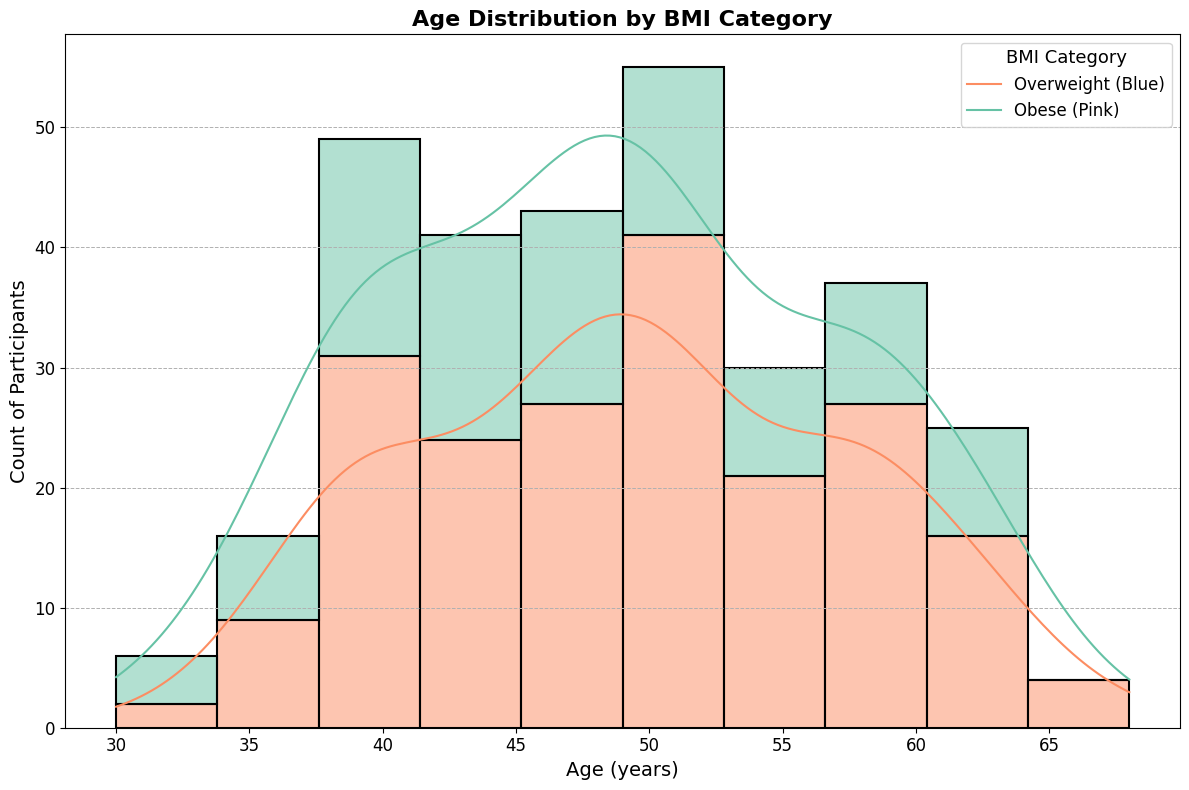

In [51]:
# Plot: Age distribution split by BMI category
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='age', hue='BMI_category', multiple='stack', kde=True, palette='Set2', edgecolor='black', linewidth=1.5)

# Add annotations to indicate each category
plt.title('Age Distribution by BMI Category', fontsize=16, fontweight='bold')
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Count of Participants', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='BMI Category', fontsize=12, title_fontsize=13, labels=['Overweight (Blue)', 'Obese (Pink)'])
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

BMI Column Statistics:
count    306.000000
mean      30.509804
std        2.376435
min       26.000000
25%       29.000000
50%       30.000000
75%       32.000000
max       38.000000
Name: BMI, dtype: float64

Unique values in BMI_category:
['Overweight', 'Obese']
Categories (2, object): ['Overweight' < 'Obese']

BMI Category Distribution:
BMI_category
Obese         202
Overweight    104
Name: count, dtype: int64


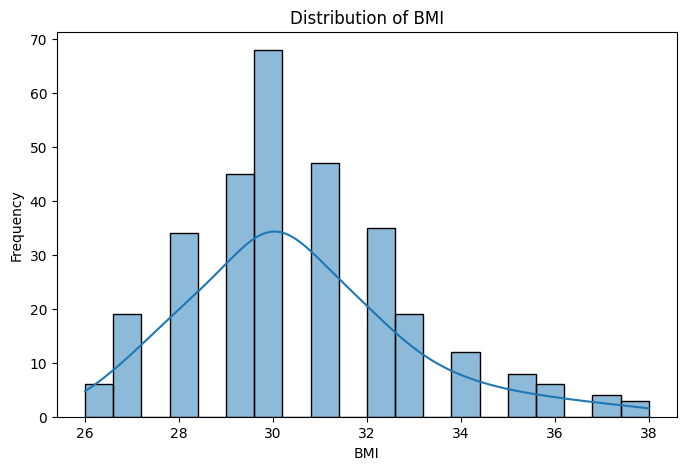

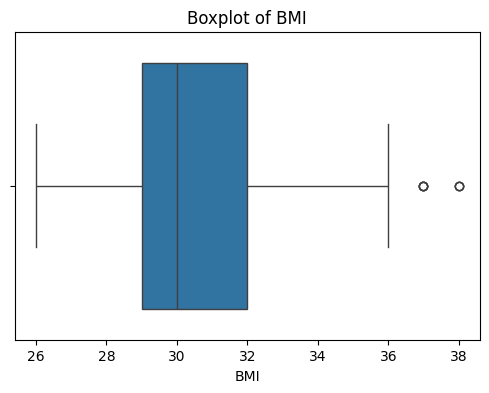


Number of outliers in BMI: 7
Outliers:
      BMI
4     38
26    37
31    38
106   37
107   38
223   37
254   37


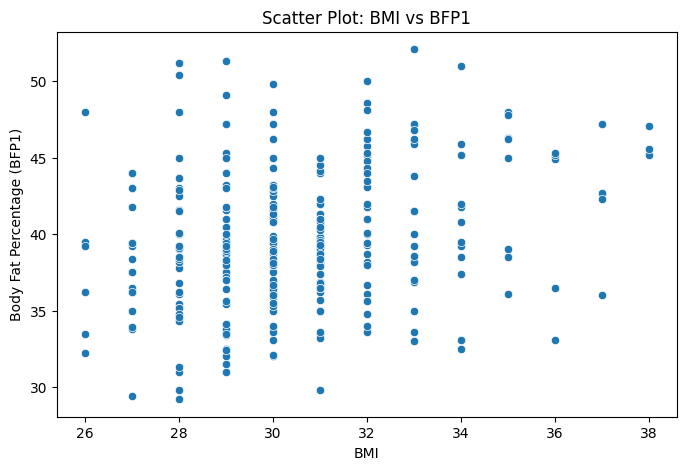

In [52]:


# Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Uncomment this if loading from a file

# Basic statistics of BMI
print("BMI Column Statistics:")
print(df['BMI'].describe())

# Check for unique values in BMI_category
print("\nUnique values in BMI_category:")
print(df['BMI_category'].unique())

# Value counts for BMI_category
print("\nBMI Category Distribution:")
print(df['BMI_category'].value_counts())

# Histogram of BMI
plt.figure(figsize=(8,5))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Distribution of BMI")
plt.show()

# Boxplot of BMI
plt.figure(figsize=(6,4))
sns.boxplot(x=df['BMI'])
plt.title("Boxplot of BMI")
plt.show()

# Checking for outliers
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
print(f"\nNumber of outliers in BMI: {outliers.shape[0]}")
if not outliers.empty:
    print("Outliers:\n", outliers[['BMI']])

# Pairing BMI with other related variables
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['BMI'], y=df['BFP1'])
plt.xlabel("BMI")
plt.ylabel("Body Fat Percentage (BFP1)")
plt.title("Scatter Plot: BMI vs BFP1")
plt.show()


In [ ]:
# # Create a summary DataFrame for participant demographics
# demographics_summary = pd.DataFrame({
#     'Metric': ['Total Participants', 'Number of Males', 'Number of Females', 'Average Age', 'Age Range', 'Number of Overweight Participants', 'Number of Obese Participants'],
#     'Value': [
#         len(df),
#         gender_counts.get('Male', 0),
#         gender_counts.get('Female', 0),
#         round(age_summary['mean'], 2),
#         f"{int(age_summary['min'])} - {int(age_summary['max'])}",
#         bmi_counts.get('Overweight', 0),
#         bmi_counts.get('Obese', 0)
#     ]
# })

# # Print the summary table
# print("\nParticipant Demographics Summary:\n", demographics_summary)

# # Optionally, save the demographics summary to a CSV file
# demographics_summary.to_csv('participant_demographics_summary.csv', index=False)  # Save the summary to a new file

In [53]:
# Replace gender codes with labels (updated to handle more cases)
df['gender'] = df['gender'].replace({0: 'Male', 1: 'Female', '0': 'Male', '1': 'Female', 'male': 'Male', 'female': 'Female'})

# Update gender breakdown calculation
gender_counts = df['gender'].value_counts()

# Update the demographics summary based on the corrected gender counts
demographics_summary = pd.DataFrame({
    'Metric': ['Total Participants', 'Number of Males', 'Number of Females', 'Average Age', 'Age Range', 'Number of Overweight Participants', 'Number of Obese Participants'],
    'Value': [
        len(df),
        gender_counts.get('Male', 0),
        gender_counts.get('Female', 0),
        round(age_summary['mean'], 2),
        f"{int(age_summary['min'])} - {int(age_summary['max'])}",
        bmi_counts.get('Overweight', 0),
        bmi_counts.get('Obese', 0)
    ]
})

# Print the updated summary table
print("\nParticipant Demographics Summary:\n", demographics_summary)



Participant Demographics Summary:
                               Metric    Value
0                 Total Participants      306
1                    Number of Males      131
2                  Number of Females      175
3                        Average Age    48.62
4                          Age Range  30 - 68
5  Number of Overweight Participants      104
6       Number of Obese Participants      202


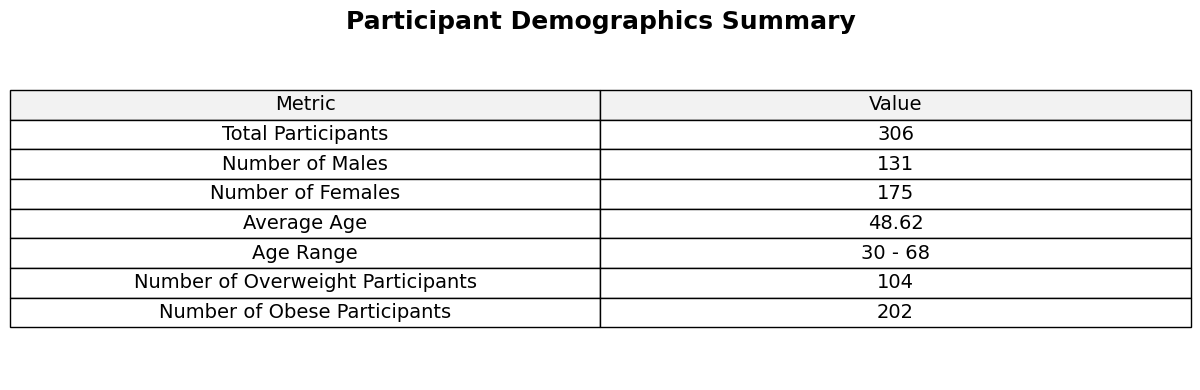

In [54]:
# Plot the demographics summary as a table for article usage
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')
table = plt.table(cellText=demographics_summary.values, colLabels=demographics_summary.columns, cellLoc='center', loc='center', colColours=['#f2f2f2', '#f2f2f2'])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.6)
plt.title('Participant Demographics Summary', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('participant_demographics_summary.png', dpi=300, bbox_inches='tight')
plt.show()



Model Performance Summary:
           Model  Accuracy  Precision (Class 2.0)  Recall (Class 2.0)  \
0    General RF     0.663                   0.67                0.88   
1        Men RF     0.750                   0.72                1.00   
2      Women RF     0.472                   0.47                0.69   
3   General SVM     0.717                   0.70                0.95   
4       Men SVM     0.675                   0.67                1.00   
5     Women SVM     0.604                   0.56                0.96   
6    General GB     0.576                   0.63                0.71   
7        Men GB     0.600                   0.67                0.77   
8      Women GB     0.509                   0.50                0.73   
9   General KNN     0.620                   0.66                0.79   
10      Men KNN     0.700                   0.72                0.88   
11    Women KNN     0.509                   0.50                0.77   

    F1 Score (Class 2.0)  Precisio

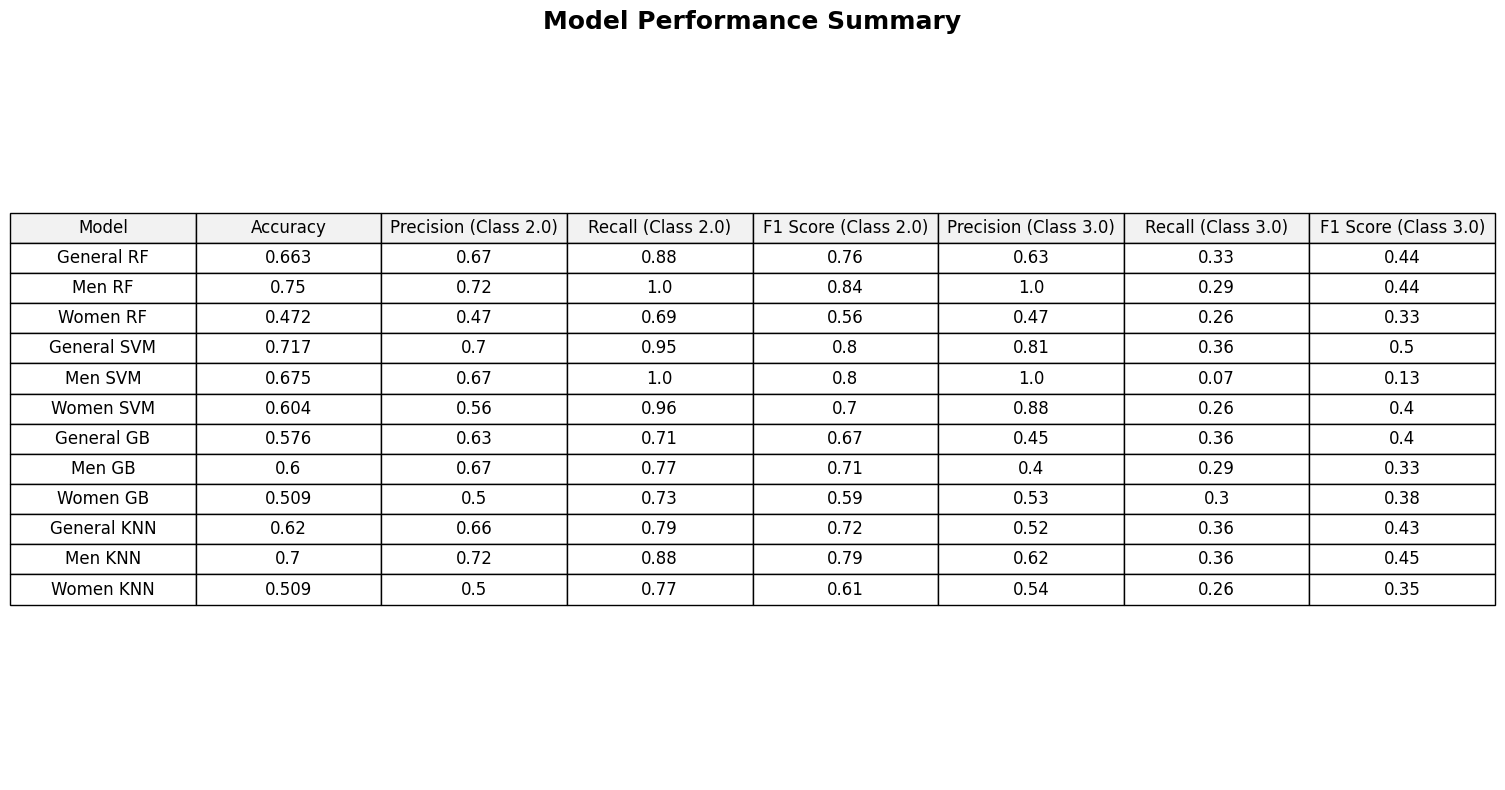

In [55]:
# Create a summary DataFrame for model performance metrics
model_performance_data = {
    'Model': ['General RF', 'Men RF', 'Women RF', 'General SVM', 'Men SVM', 'Women SVM', 'General GB', 'Men GB', 'Women GB', 'General KNN', 'Men KNN', 'Women KNN'],
    'Accuracy': [0.663, 0.75, 0.472, 0.717, 0.675, 0.604, 0.576, 0.6, 0.509, 0.620, 0.7, 0.509],
    'Precision (Class 2.0)': [0.67, 0.72, 0.47, 0.70, 0.67, 0.56, 0.63, 0.67, 0.50, 0.66, 0.72, 0.50],
    'Recall (Class 2.0)': [0.88, 1.00, 0.69, 0.95, 1.00, 0.96, 0.71, 0.77, 0.73, 0.79, 0.88, 0.77],
    'F1 Score (Class 2.0)': [0.76, 0.84, 0.56, 0.80, 0.80, 0.70, 0.67, 0.71, 0.59, 0.72, 0.79, 0.61],
    'Precision (Class 3.0)': [0.63, 1.00, 0.47, 0.81, 1.00, 0.88, 0.45, 0.40, 0.53, 0.52, 0.62, 0.54],
    'Recall (Class 3.0)': [0.33, 0.29, 0.26, 0.36, 0.07, 0.26, 0.36, 0.29, 0.30, 0.36, 0.36, 0.26],
    'F1 Score (Class 3.0)': [0.44, 0.44, 0.33, 0.50, 0.13, 0.40, 0.40, 0.33, 0.38, 0.43, 0.45, 0.35]
}
model_performance_summary = pd.DataFrame(model_performance_data)

# Print the model performance summary table
print("\nModel Performance Summary:\n", model_performance_summary)

# Optionally, save the model performance summary to a CSV file
model_performance_summary.to_csv('model_performance_summary.csv', index=False)  # Save the summary to a new file

# Plot the model performance summary as a table for article usage
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = plt.table(cellText=model_performance_summary.values, colLabels=model_performance_summary.columns, cellLoc='center', loc='center', colColours=['#f2f2f2'] * len(model_performance_summary.columns))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)
plt.title('Model Performance Summary', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('model_performance_summary.png', dpi=300, bbox_inches='tight')
plt.show()

In [56]:
# Replace the grades with meaningful class labels
df['fatty_liver_grade_pre'] = df['fatty_liver_grade_pre'].replace(1.0, 'Mild to Moderate')
df['fatty_liver_grade_pre'] = df['fatty_liver_grade_pre'].replace(1.5, 'Mild to Moderate')
df['fatty_liver_grade_pre'] = df['fatty_liver_grade_pre'].replace(2.5, 'Severe')

# Count the number of instances in each category
item_counts = df['fatty_liver_grade_pre'].value_counts()
print(item_counts)


fatty_liver_grade_pre
2.0    192
3.0    114
Name: count, dtype: int64


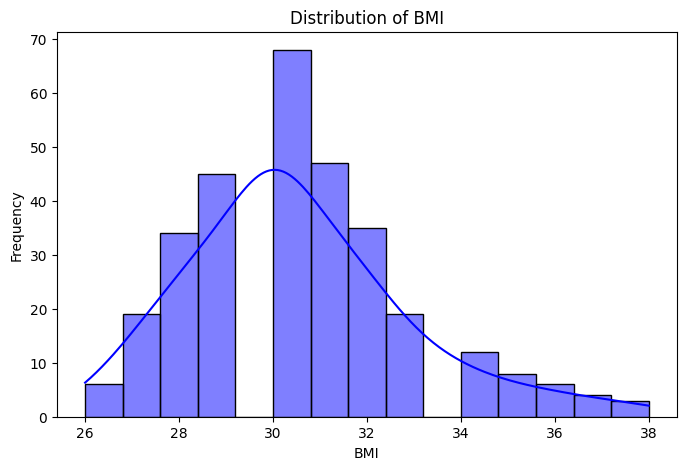

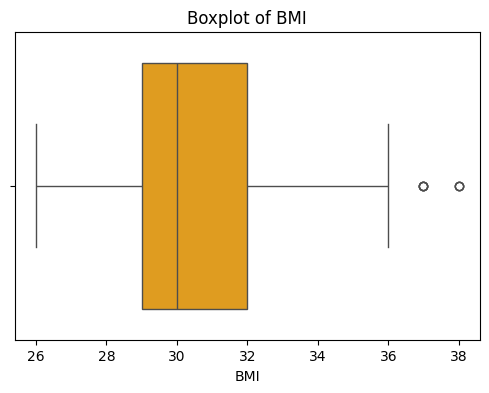

Correlation between BMI and Age:
           BMI       age
BMI  1.000000  0.111346
age  0.111346  1.000000


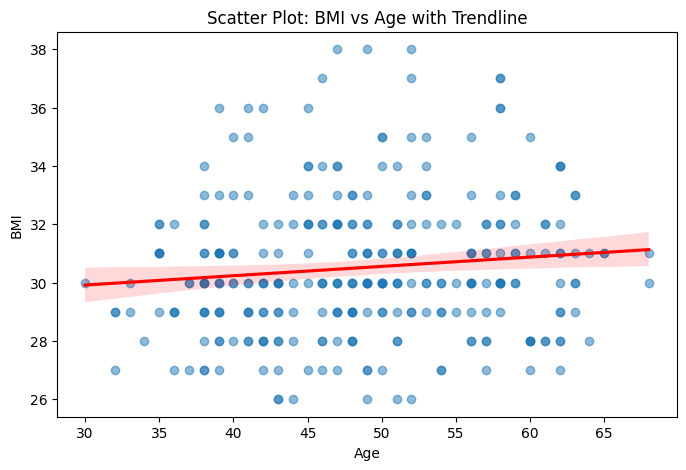

Unique values in gender column: ['Female' 'Male']

BMI Summary Statistics by Gender:
         count       mean       std   min   25%   50%   75%   max
gender                                                          
Female  175.0  30.680000  2.654513  26.0  29.0  31.0  32.0  38.0
Male    131.0  30.282443  1.930623  27.0  29.0  30.0  31.0  37.0


<ipython-input-57-e73020b39d7d>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['gender'], y=df['BMI'], palette='pastel')


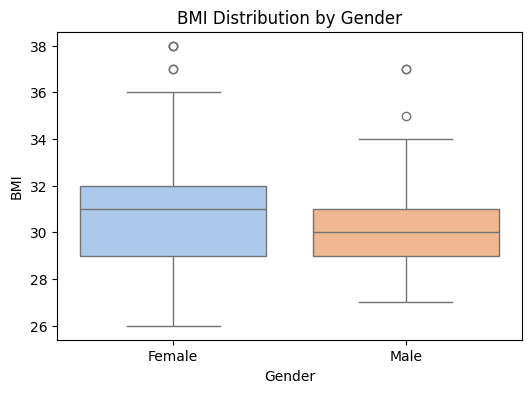

<ipython-input-57-e73020b39d7d>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['gender'] == 'Male']['BMI'], label="Male", shade=True)
<ipython-input-57-e73020b39d7d>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['gender'] == 'Female']['BMI'], label="Female", shade=True)


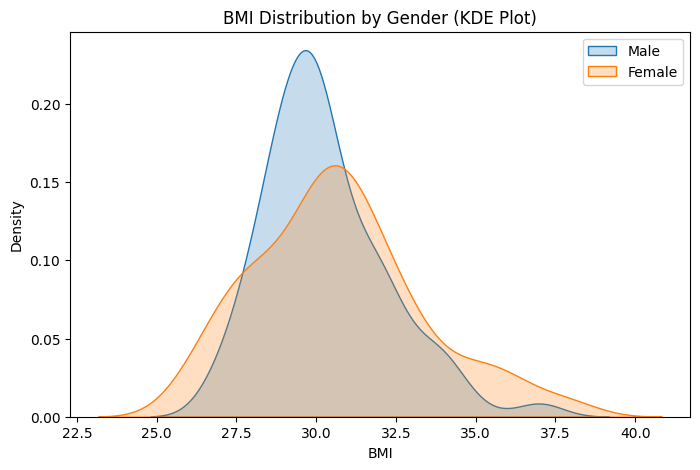

In [57]:


# Assuming df is your dataset
# df = pd.read_csv("your_dataset.csv")  # Uncomment if loading from a file

### Step 1: BMI Distribution ###
plt.figure(figsize=(8,5))
sns.histplot(df['BMI'], bins=15, kde=True, color='blue')
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Distribution of BMI")
plt.show()

# Boxplot to visualize potential outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['BMI'], color='orange')
plt.title("Boxplot of BMI")
plt.show()

### Step 2: Relationship Between BMI & Age ###
# Correlation between BMI and Age
correlation = df[['BMI', 'age']].corr()
print("Correlation between BMI and Age:\n", correlation)

# Scatter plot with trendline
plt.figure(figsize=(8,5))
sns.regplot(x=df['age'], y=df['BMI'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Scatter Plot: BMI vs Age with Trendline")
plt.show()

### Step 3: Relationship Between BMI & Gender ###
# Check unique gender values
print("Unique values in gender column:", df['gender'].unique())

# Group by gender and summarize BMI
gender_bmi_stats = df.groupby('gender')['BMI'].describe()
print("\nBMI Summary Statistics by Gender:\n", gender_bmi_stats)

# Boxplot to compare BMI across genders
plt.figure(figsize=(6,4))
sns.boxplot(x=df['gender'], y=df['BMI'], palette='pastel')
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.title("BMI Distribution by Gender")
plt.show()

# KDE plot to compare BMI distributions by gender
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['gender'] == 'Male']['BMI'], label="Male", shade=True)
sns.kdeplot(df[df['gender'] == 'Female']['BMI'], label="Female", shade=True)
plt.xlabel("BMI")
plt.ylabel("Density")
plt.title("BMI Distribution by Gender (KDE Plot)")
plt.legend()
plt.show()


In [ ]:
df

In [ ]:
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

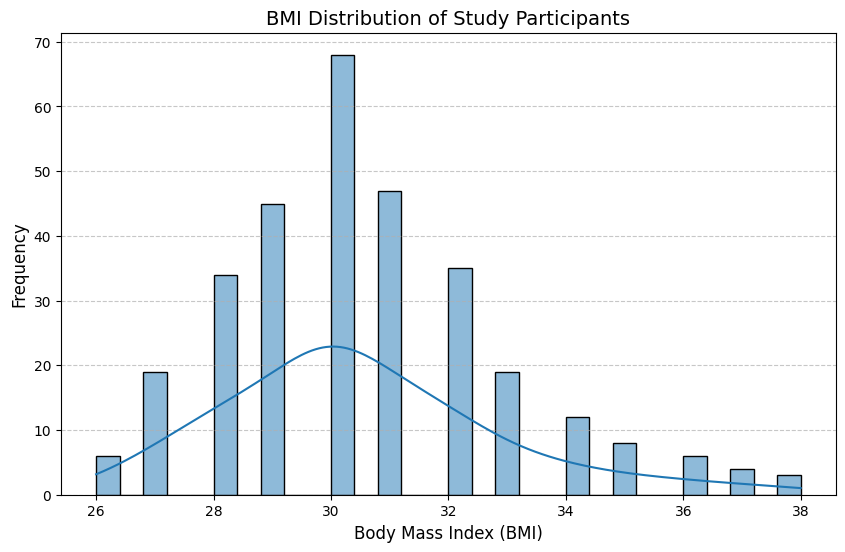

In [58]:






# Step 3: Plot BMI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color="#1f77b4", edgecolor="black")

# Step 4: Customize labels and title
plt.xlabel("Body Mass Index (BMI)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("BMI Distribution of Study Participants", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save and download the figure
plt.savefig("bmi_distribution_histogram.png")

from google.colab import files
files.download("bmi_distribution_histogram.png")

# Display the histogram
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

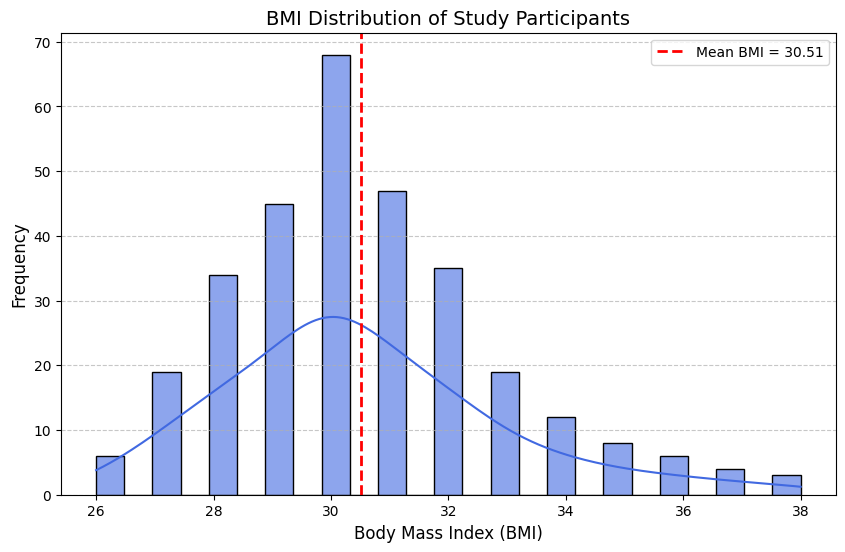

In [59]:
# Step 4: Compute mean BMI
mean_bmi = df["BMI"].mean()

# Step 5: Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=25, kde=True, color="royalblue", edgecolor="black", alpha=0.6)

# Step 6: Add a vertical line for the mean BMI
plt.axvline(mean_bmi, color="red", linestyle="dashed", linewidth=2, label=f"Mean BMI = {mean_bmi:.2f}")

# Step 7: Customize labels, title, and legend
plt.xlabel("Body Mass Index (BMI)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("BMI Distribution of Study Participants", fontsize=14)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Step 8: Save and download the figure
plt.savefig("bmi_distribution_histogram.png")

files.download("bmi_distribution_histogram.png")

# Display the histogram
plt.show()